In [150]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl


In [151]:
df=pd.read_csv('quikr_car.csv')
df

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel
...,...,...,...,...,...,...
887,Ta,Tara,zest,"3,10,000",NaN,NaN
888,Tata Zest XM Diesel,Tata,2018,"2,60,000","27,000 kms",Diesel
889,Mahindra Quanto C8,Mahindra,2013,"3,90,000","40,000 kms",Diesel
890,Honda Amaze 1.2 E i VTEC,Honda,2014,"1,80,000",Petrol,NaN


In [152]:
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [153]:
df.shape

(892, 6)

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


 #### create  backup of csv file

In [155]:
backup=df.copy()

## Quality

- names are pretty inconsistent
- names have company names attached to it
- some names are spam like 'Maruti Ertiga showroom condition with' and 'Well mentained Tata Sumo'
- company: many of the names are not of any company like 'Used', 'URJENT', and so on.
- year has many non-year values
- year is in object. Change to integer
- Price has Ask for Price
- Price has commas in its prices and is in object
- kms_driven has object values with kms at last.
- It has nan values and two rows have 'Petrol' in them
- fuel_type has nan values

## Cleaning Data 

#### year has many non-year values

In [156]:
df=df[df["year"].str.isnumeric()]

#### year is in object. Change to integer

In [157]:
df['year']=df['year'].astype(int)

/tmp/ipykernel_72437/1756822702.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year']=df['year'].astype(int)


In [158]:
df

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel
...,...,...,...,...,...,...
886,Toyota Corolla Altis,Toyota,2009,"3,00,000","1,32,000 kms",Petrol
888,Tata Zest XM Diesel,Tata,2018,"2,60,000","27,000 kms",Diesel
889,Mahindra Quanto C8,Mahindra,2013,"3,90,000","40,000 kms",Diesel
890,Honda Amaze 1.2 E i VTEC,Honda,2014,"1,80,000",Petrol,NaN


#### Price has Ask for Price

In [159]:
df=df[df["Price"]!="Ask For Price"]

#### Price has commas in its prices and is in object

In [160]:
df['Price']=df["Price"].str.replace(',',"").astype(int)

/tmp/ipykernel_72437/977782835.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price']=df["Price"].str.replace(',',"").astype(int)


####  kms_driven has object values with kms at last.

In [161]:
df["kms_driven"]=df["kms_driven"].str.split().str.get(0).str.replace(",","")

/tmp/ipykernel_72437/3539927773.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["kms_driven"]=df["kms_driven"].str.split().str.get(0).str.replace(",","")


#### It has nan values and two rows have 'Petrol' in them

In [162]:
df=df[df["kms_driven"].str.isnumeric()]

In [163]:
df['kms_driven']=df['kms_driven'].astype(int)

#### fuel_type has nan values

In [164]:
df["fuel_type"].isna()

0      False
1      False
3      False
4      False
6      False
       ...  
883    False
885    False
886    False
888    False
889    False
Name: fuel_type, Length: 817, dtype: bool

In [165]:
df["fuel_type"].unique()


array(['Petrol', 'Diesel', nan, 'LPG'], dtype=object)

### Removing nan key from fuel type column

In [166]:
df.loc[df["fuel_type"].isna() == True, "fuel_type"] = "not available"

### name and company had spammed data...but with the previous cleaning, those rows got removed.

#### Company does not need any cleaning now. Changing car names. Keeping only the first three words

In [167]:
df["name"]=df["name"].str.split().str.slice(start=0,stop=3).str.join(' ')

#### Resetting the index of the final cleaned data

In [168]:
df=df.reset_index(drop=True)

### Cleaned DATA

In [169]:
df

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
812,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
813,Tata Indica V2,Tata,2009,110000,30000,Diesel
814,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
815,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [170]:
df.to_csv('Cleaned_Car_data.csv')

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817 entries, 0 to 816
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        817 non-null    object
 1   company     817 non-null    object
 2   year        817 non-null    int64 
 3   Price       817 non-null    int64 
 4   kms_driven  817 non-null    int64 
 5   fuel_type   817 non-null    object
dtypes: int64(3), object(3)
memory usage: 38.4+ KB


In [172]:
df.describe(include='all')

,name,company,year,Price,kms_driven,fuel_type
count,817,817,817.000000,8.170000e+02,817.000000,817
unique,254,25,NaN,NaN,NaN,4
top,Maruti Suzuki Swift,Maruti,NaN,NaN,NaN,Petrol
freq,51,221,NaN,NaN,NaN,428
mean,NaN,NaN,2012.440636,4.115503e+05,46250.714810,NaN
std,NaN,NaN,4.002354,4.749173e+05,34283.745254,NaN
min,NaN,NaN,1995.000000,3.000000e+04,0.000000,NaN
25%,NaN,NaN,2010.000000,1.750000e+05,27000.000000,NaN
50%,NaN,NaN,2013.000000,2.999990e+05,41000.000000,NaN
75%,NaN,NaN,2015.000000,4.900000e+05,56758.000000,NaN


In [173]:
df=df[df['Price']<6000000]

### Checking relationship of Company with Price

In [174]:
df["company"].unique()

array(['Hyundai', 'Mahindra', 'Ford', 'Maruti', 'Skoda', 'Audi', 'Toyota',
       'Renault', 'Honda', 'Datsun', 'Mitsubishi', 'Tata', 'Volkswagen',
       'Chevrolet', 'Mini', 'BMW', 'Nissan', 'Hindustan', 'Fiat', 'Force',
       'Mercedes', 'Land', 'Jaguar', 'Jeep', 'Volvo'], dtype=object)

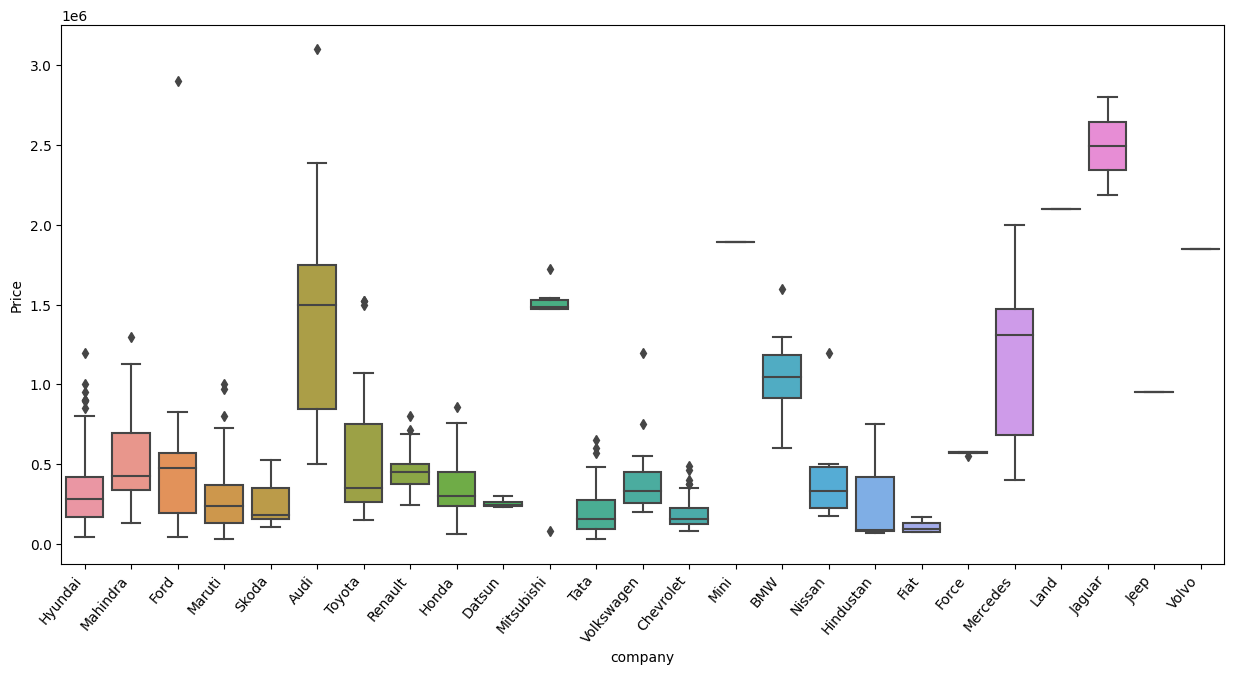

In [175]:
plt.subplots(figsize=(15,7))
ax=sns.boxplot(x='company',y='Price',data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=50,ha='right')
plt.show()

### Checking relationship of Year with Price

/home/dell/Documents/GitHub/Car-Price-Prediction-main/.env/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 13.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/dell/Documents/GitHub/Car-Price-Prediction-main/.env/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 12.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/dell/Documents/GitHub/Car-Price-Prediction-main/.env/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 6.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/dell/Documents/GitHub/Car-Price-Prediction-main/.env/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 10.6% of the points cannot be placed; you may want to decrease t

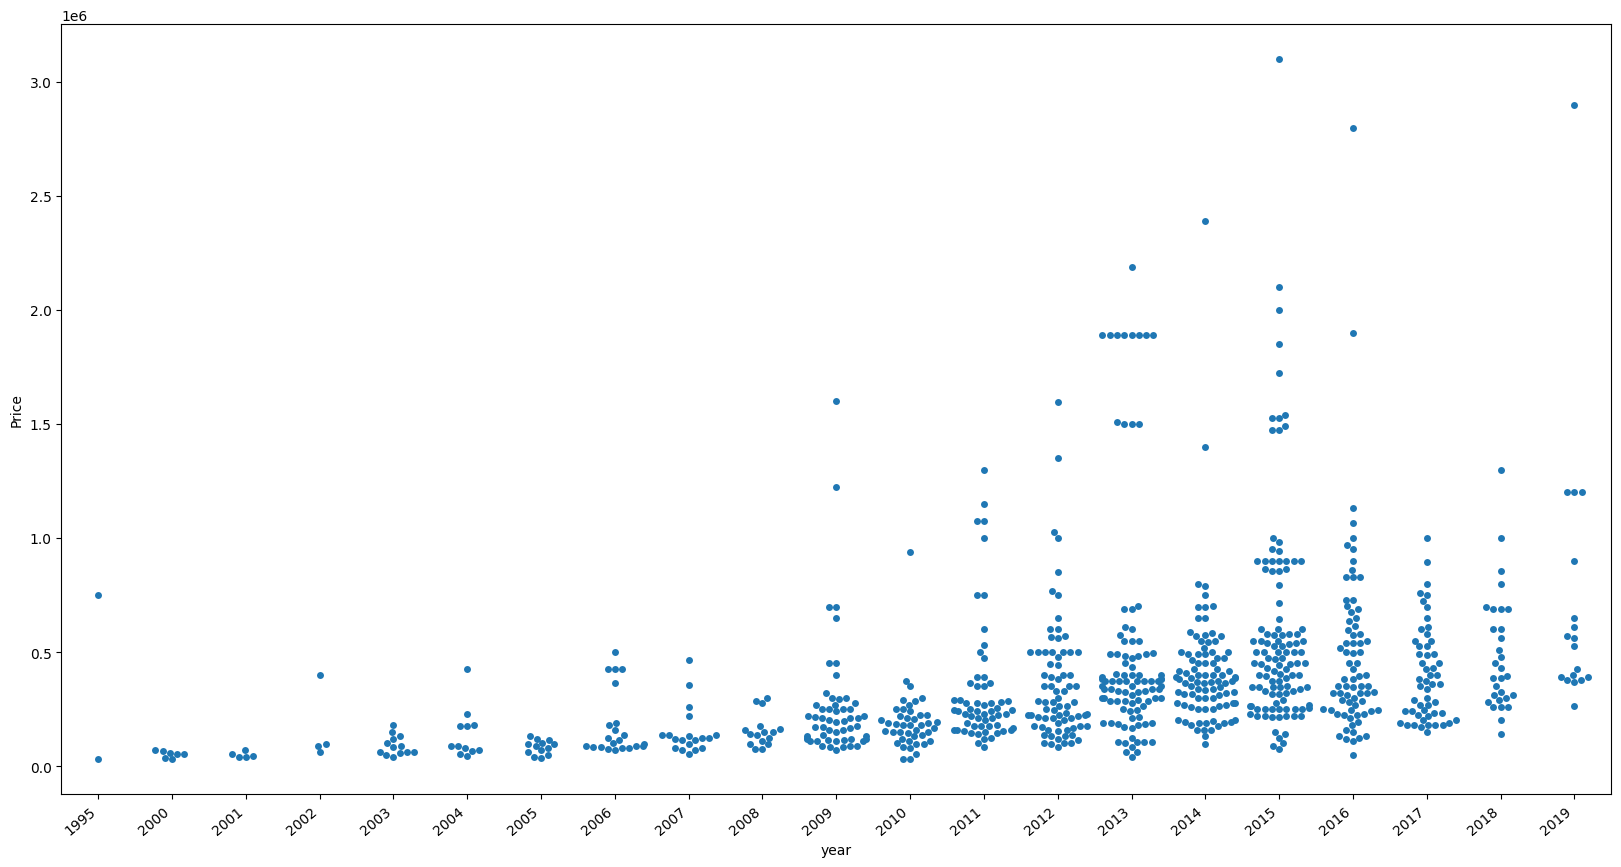

In [176]:
plt.subplots(figsize=(20,10))
ax=sns.swarmplot(x='year',y='Price',data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

### Checking relationship of kms_driven with Price

/home/dell/Documents/GitHub/Car-Price-Prediction-main/.env/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


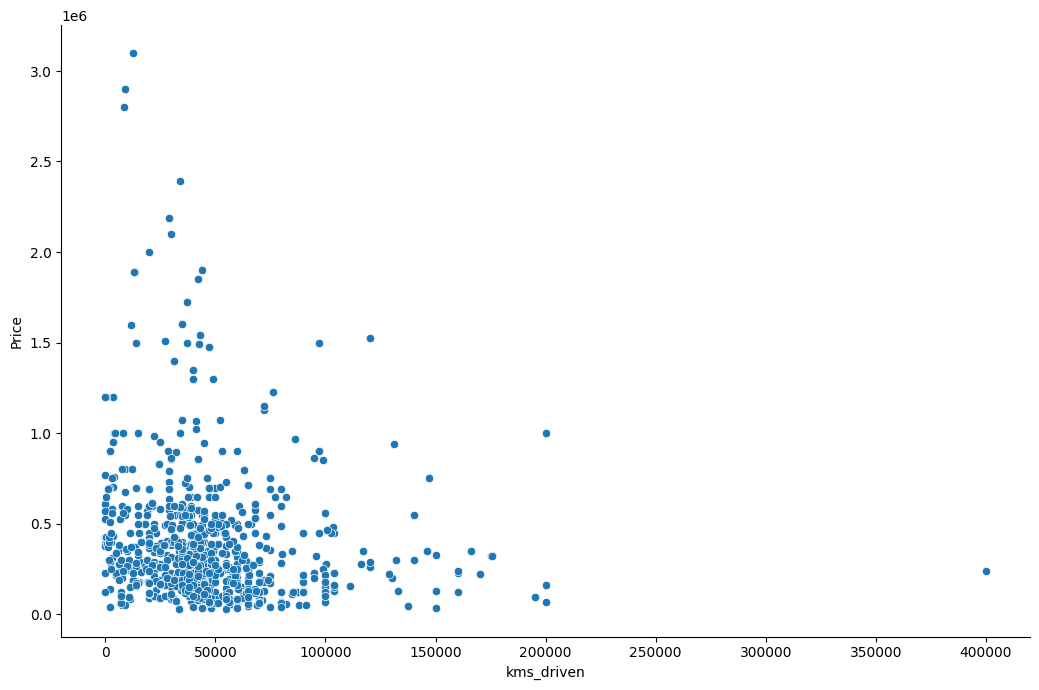

In [177]:
sns.relplot(x='kms_driven',y='Price',data=df,height=7,aspect=1.5)

### Checking relationship of Fuel Type with Price

<Axes: xlabel='fuel_type', ylabel='Price'>

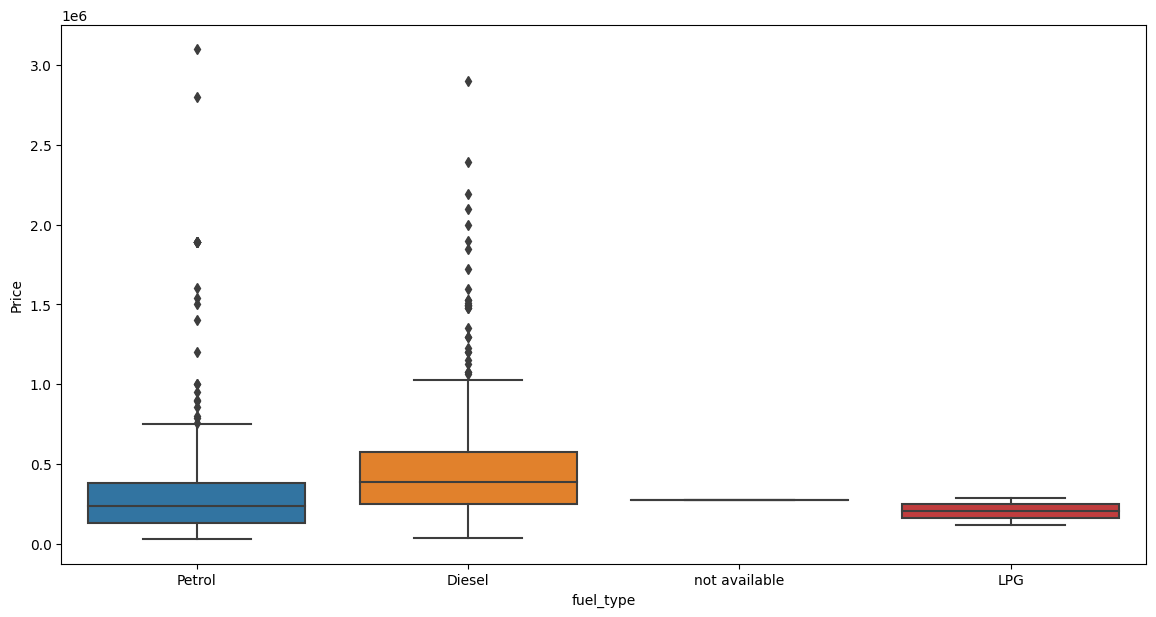

In [178]:
plt.subplots(figsize=(14,7))
sns.boxplot(x='fuel_type',y='Price',data=df)

In [179]:
df[["fuel_type"]]

,fuel_type
0,Petrol
1,Diesel
2,Petrol
3,Diesel
4,Diesel
...,...
812,Petrol
813,Diesel
814,Petrol
815,Diesel


### Relationship of Price with FuelType, Year and Company mixed

/home/dell/Documents/GitHub/Car-Price-Prediction-main/.env/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


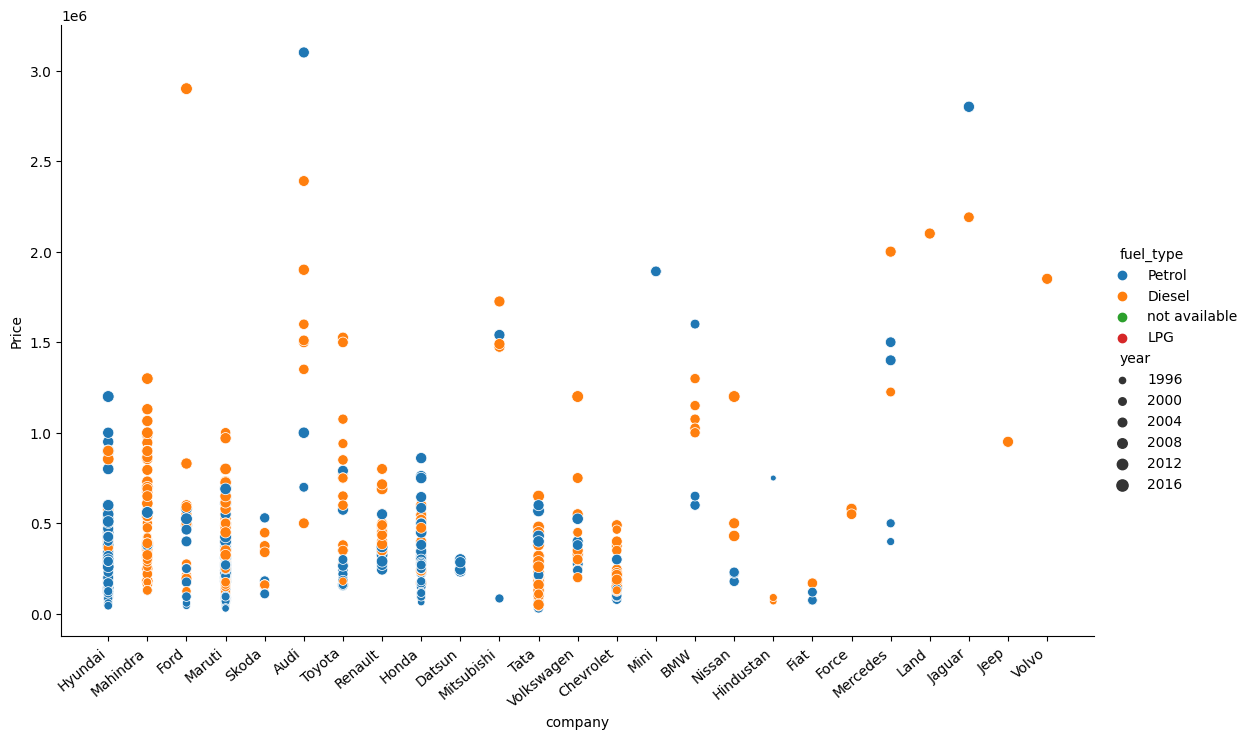

In [180]:
ax=sns.relplot(x='company',y='Price',data=df,hue='fuel_type',size='year',height=7,aspect=1.6)
ax.set_xticklabels(rotation=40,ha='right')

### Extracting Training Data

In [181]:
X=df[['name',"company","year","kms_driven","fuel_type"]]
y=df['Price']

In [182]:
X

,name,company,year,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,36000,Diesel
4,Ford Figo,Ford,2012,41000,Diesel
...,...,...,...,...,...
812,Maruti Suzuki Ritz,Maruti,2011,50000,Petrol
813,Tata Indica V2,Tata,2009,30000,Diesel
814,Toyota Corolla Altis,Toyota,2009,132000,Petrol
815,Tata Zest XM,Tata,2018,27000,Diesel


### applying Train Test Split

In [183]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [184]:
from sklearn.linear_model import LinearRegression

In [185]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

#### Creating an OneHotEncoder object to contain all the possible categories 

In [186]:
ohe=OneHotEncoder()
ohe.fit(X[['name','company','fuel_type']])

OneHotEncoder()

In [187]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name','company','fuel_type']),
                                    remainder='passthrough')

linear regression

In [188]:
lr=LinearRegression()

#### making A pipline


In [189]:
pipe=make_pipeline(column_trans,lr)

#### Fitting the  model

In [190]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Petrol', 'not available'], dtype=object)]),
                                                  ['name', 'company',
                                                   'fuel_type'])])),
                ('linearregression', LinearRegression())])

In [191]:
y_pred=pipe.predict(X_test)

#### Checking R2 Score

In [192]:
r2_score(y_test,y_pred)

0.7650066222566616

In [193]:
#### Finding the model with a random state of TrainTestSplit where the model was found to give almost 0.92 as r2_score

In [194]:
scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))

In [195]:
np.argmax(scores)

852

In [196]:
scores[np.argmax(scores)]

0.8939890655889766

In [197]:
pipe.predict(pd.DataFrame(columns=X_test.columns,data=np.array(['Maruti Suzuki Swift','Maruti',2019,100,'Petrol']).reshape(1,5)))

array([435146.28619381])

#### The best model is found at a certain random state 

In [198]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=np.argmax(scores))
lr=LinearRegression()
pipe=make_pipeline(column_trans,lr)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
r2_score(y_test,y_pred)

0.8939890655889766

In [199]:
import pickle

In [200]:
pickle.dump(pipe,open('LinearRegressionModel.pkl','wb'))

In [201]:
pipe.predict(pd.DataFrame(columns=['name','company','year','kms_driven','fuel_type'],data=np.array(['Maruti Suzuki Swift','Maruti',2019,100,'Petrol']).reshape(1,5)))

array([451552.72710773])

In [202]:
pipe.steps[0][1].transformers[0][1].categories[0]

array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat Diesel',
       'Chevrolet Beat LS', 'Chevrolet Beat LT', 'Chevrolet Beat PS',
       'Chevrolet Cruze LTZ', 'Chevrolet Enjoy', 'Chevrolet Enjoy 1.4',
       'Chevrolet Sail 1.2', 'Chevrolet Sail UVA', 'Chevrolet Spark',
       'Chevrolet Spark 1.0', 'Chevrolet Spark LS', 'Chevrolet Spark LT',
       'Chevrolet Tavera LS', 'Chevrolet Tavera Neo', 'Datsun GO T',
       'Datsun Go Plus', 'Datsun Redi GO', 'Fiat Linea Emotion',
       'Fiat Petra ELX', 'Fiat Punto Emotion', 'Force Motors Force',
       'Force Motors One', 'Ford EcoSport', 'Ford EcoSport Ambiente',
       'Ford EcoSport Titanium', 'Ford EcoSport Trend',
       'Ford Endeavor 4x4', 'Ford Fiesta', 'Ford Fiesta SXi', 'Ford Figo',
       'Ford Figo Diese

In [203]:
df["fuel_type"].unique()

array(['Petrol', 'Diesel', 'not available', 'LPG'], dtype=object)